In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read image and convert it to grayscale
image = cv2.imread('../assets/passport/passport-unaligned - Copy.jpg')
image = cv2.resize(image, None, fx=0.9, fy=0.9)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Now convert grayscale image to binary image
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Now detect contours

contours, hierarchy = cv2.findContours(binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# visiualize the data structure
print('Length of contours {}'.format(len(contours)))
# print(contours)

# draw contours on original image
image_copy = image.copy()
image_copy = cv2.drawContours(image_copy, contours, -1, (0,255,0), thickness=2, lineType=cv2.LINE_AA)


# plt.imshow(gray)

# plt.imshow(image_copy)

Length of contours 1027


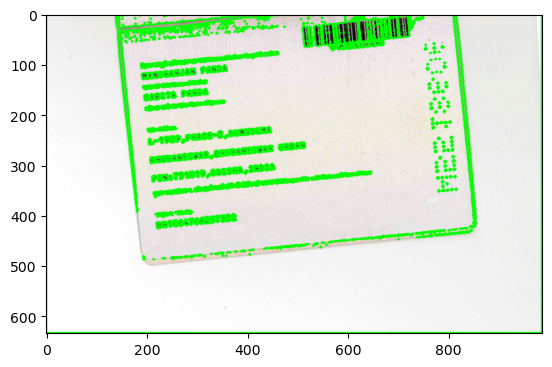

In [5]:
plt.imshow(image_copy)

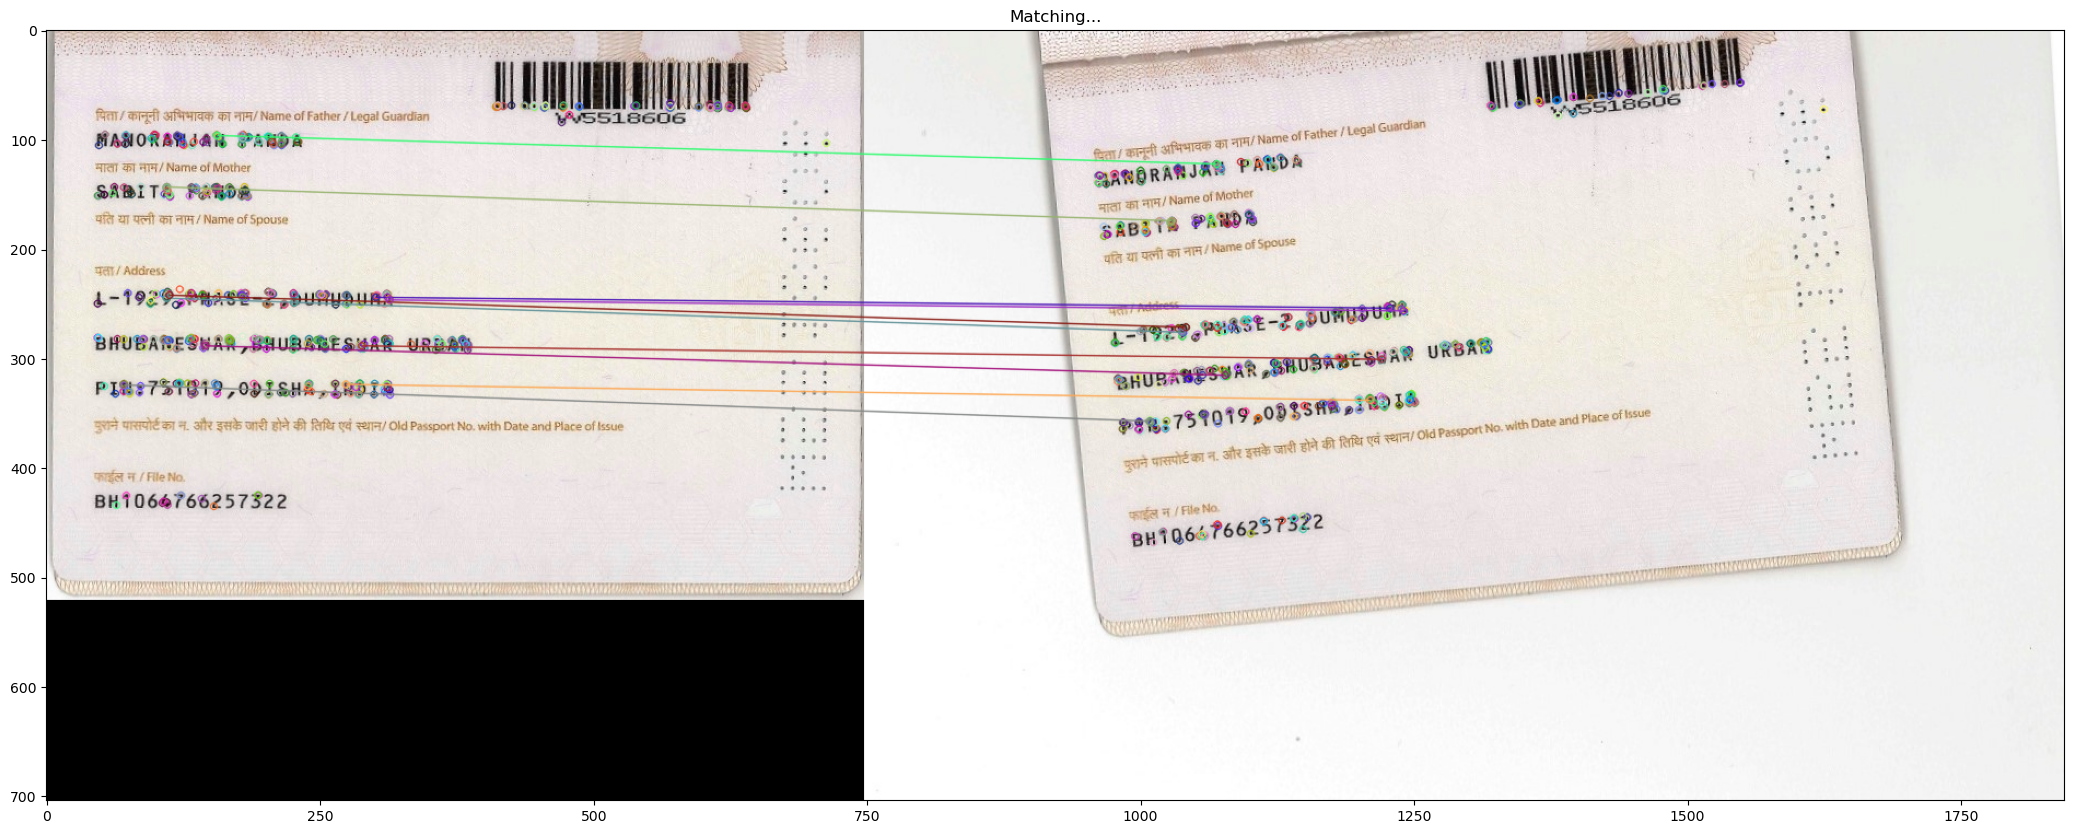

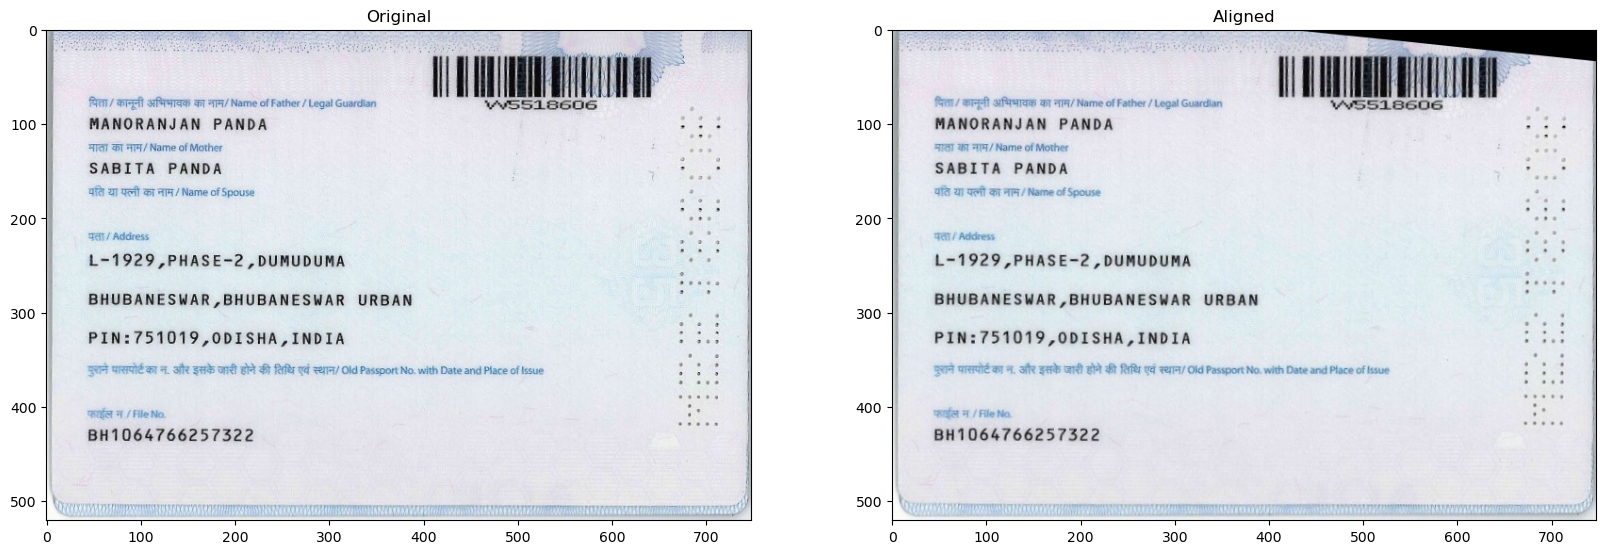

In [29]:
# Read images
im1 = cv2.imread("../assets/passport/Bhagabati prasad - Passport_page-0002.jpg")  # reference image
im2 = cv2.imread("../assets/passport/passport-unaligned - Copy.jpg")  # image to be aligned

# Convert images to grayscale
gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Detect ORB features and descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Match features using Brute Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches[:10], None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches)
plt.title("Matching...")
plt.show()

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Convert Grayscale to RGB
im1_rgb = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2_reg_rgb = cv2.cvtColor(im2_reg, cv2.COLOR_BGR2RGB)

# Convert RGB to Grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_reg_gray = cv2.cvtColor(im2_reg, cv2.COLOR_BGR2GRAY)

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(1, 2, 1)
plt.imshow(im1_rgb)
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(im2_reg_rgb)
plt.title("Aligned")
plt.show()

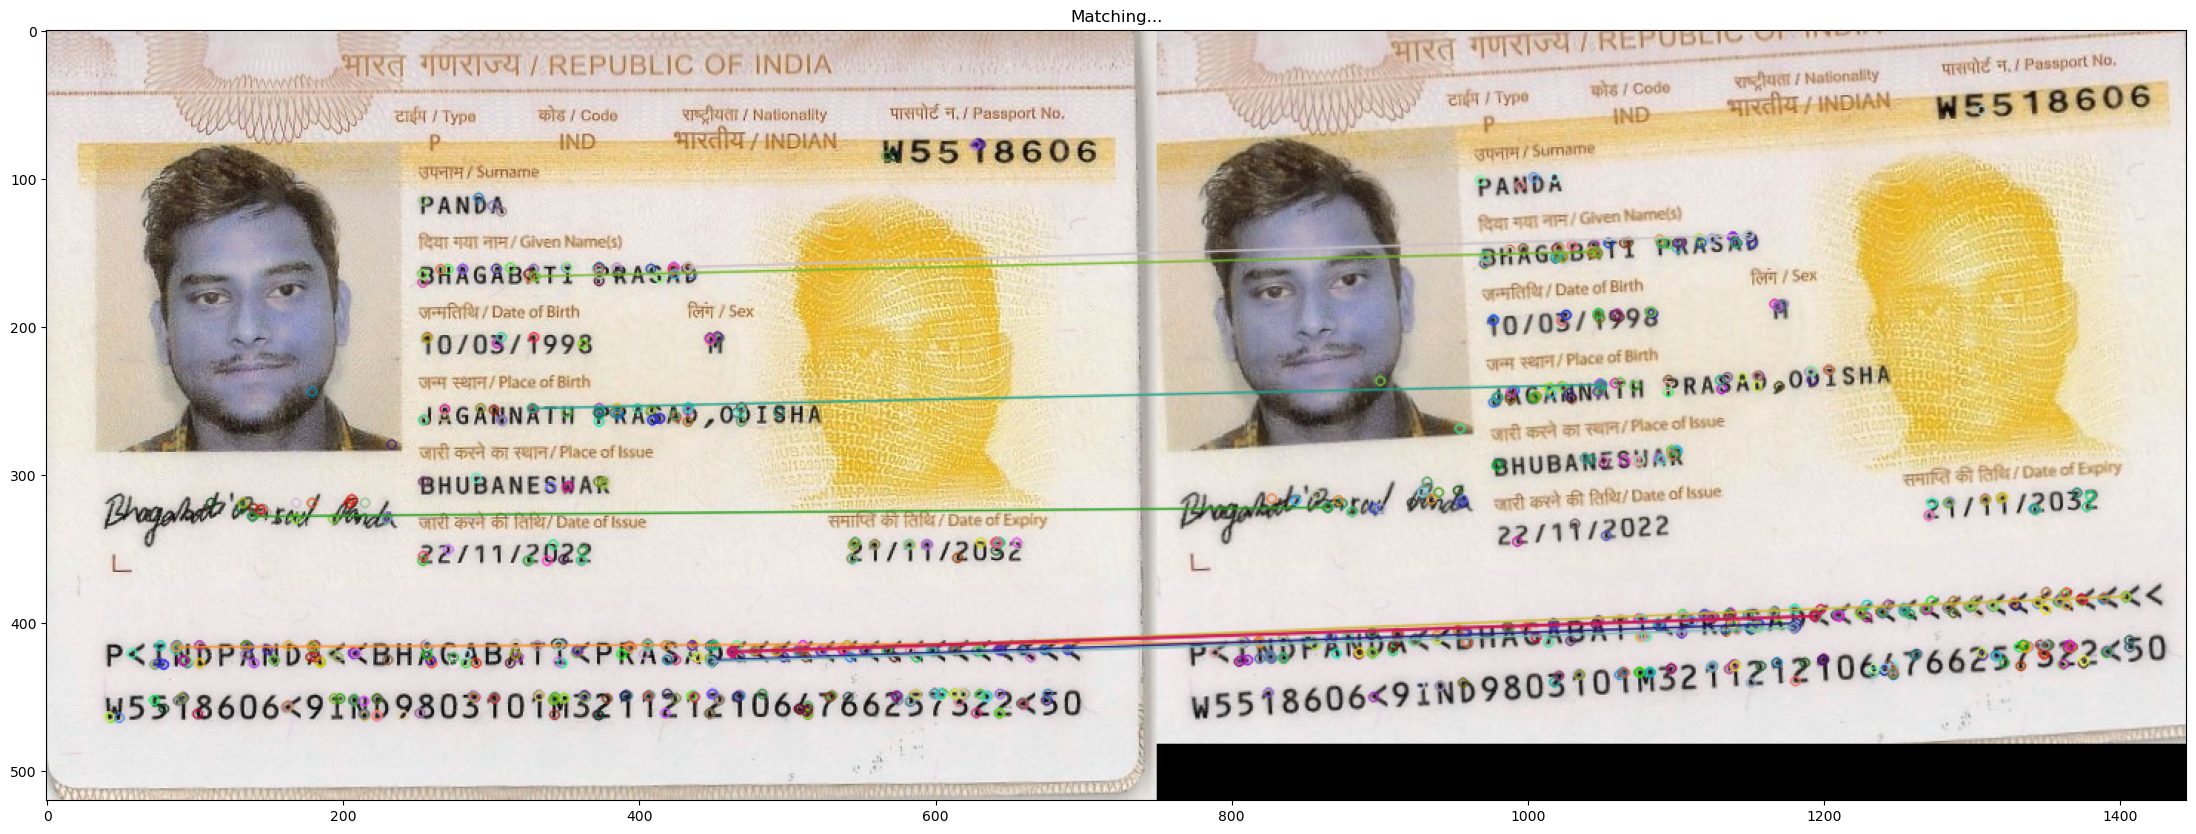

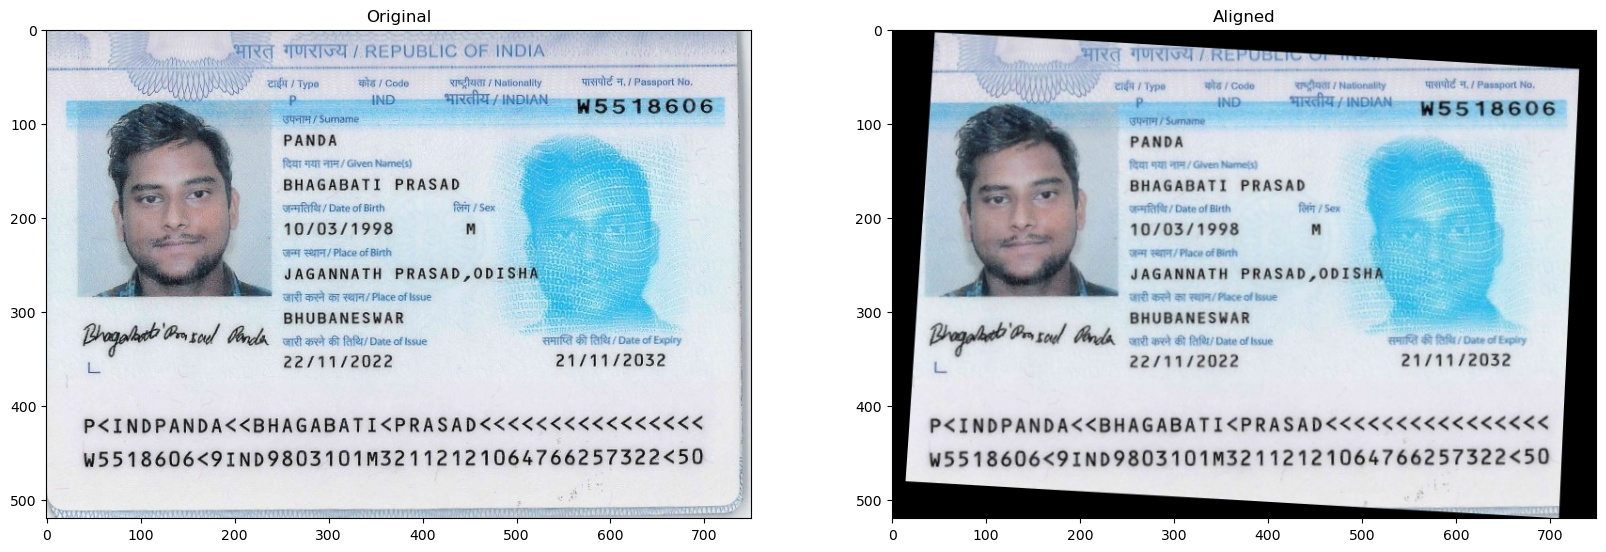

In [31]:
# Read images
im1 = cv2.imread(
    "../assets/passport/Bhagabati prasad - Passport_page-0001.jpg"
)  # reference image
im2 = cv2.imread(
    "../assets/passport/Bhagabati prasad - Passport_page-0001 - Copy.jpg"
)  # image to be aligned

# Convert images to grayscale
gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Detect ORB features and descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Match features using Brute Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches[:10], None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches)
plt.title("Matching...")
plt.show()

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Convert Grayscale to RGB
im1_rgb = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2_reg_rgb = cv2.cvtColor(im2_reg, cv2.COLOR_BGR2RGB)

# Convert RGB to Grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_reg_gray = cv2.cvtColor(im2_reg, cv2.COLOR_BGR2GRAY)

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(1, 2, 1)
plt.imshow(im1_rgb)
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(im2_reg_rgb)
plt.title("Aligned")
plt.show()

Apply OCR

In [2]:
import re
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

Symmes TORTS / REPUBLIC OF INDIA 1
Wye znd / Type its / code ‘arse / Nationality ‘ante 1. Passport No,
scsecpemamemst ts p IND. AINA /INDIAN- yg

eae aie ee) ” W5518606 |
7 PANDA cigs
& ears AH/ Given Name(s) Re ae L
Po aes i
me Y BHAGABATI PRASAD Se |
eae Rise |
ye 10/03/1998 ™ yer ee i
N “ ‘WF $211 / Place of Binh be ee gy \

i JAGANNATH PRASAD,ODISHA |
ss OT aa |
5 BHUBANESWAR SONGS eee i
BPraggla Po seul Borda. 0: 2505 & P94) Dae osu -saTft  PAA/ Date of Expiry |
ie 22/11/2022 21/11/2032
P<INDPANDA<<BHAGABAT I<PRASAD<<<<<<<<<<<<<<<< |
W5518606<91ND9803101M32112121064766257322<50
f



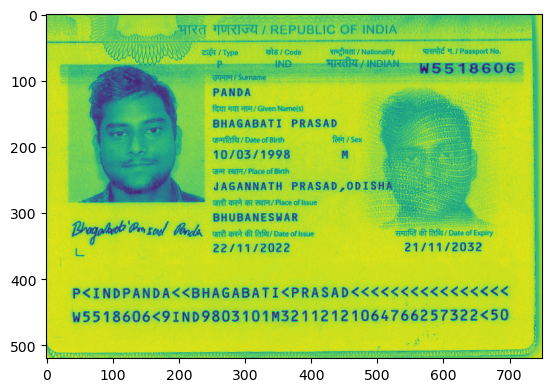

In [3]:
img = cv2.imread(
    "../assets/passport/Bhagabati prasad - Passport_page-0001.jpg"
)  # image to be aligned

# Convert images to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussian blur
blur = cv2.GaussianBlur(gray, (3, 3), 0)
# Otsu's threshold
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

selected_img = gray
data = pytesseract.image_to_string(
        selected_img, lang="eng", config="--psm 6"
)
plt.imshow(selected_img)
print(data)

text = data.replace("\n", " new_line ")

In [15]:
from datetime import datetime

today = datetime.today()

def extract_passport_front(text):
    # init variables
    splitted_text = []
    passport_no = None
    surname = None
    name = None
    dob = None
    place_of_birth=None
    expiry_date = None
    # Variables for keeping index no
    passport_no_index = None
    name_indx = None
    birth_place_indx = None

    for txt in text.split("new_line"):
        txt = txt.strip()
        if txt:
            print(txt)
            splitted_text.append(txt)

    for current_index, data in enumerate(splitted_text):
        if passport_no == None:
            passpost_no_match = re.search('[A-Z][0-9]{6}[1-9]', data)
            if passpost_no_match:
                passport_no_index = current_index
                passport_no = passpost_no_match.group(0)
            else:
                passpost_no_match2 = re.search('[A-Z][ ]{1}[0-9]{6}[1-9]', data)
                if passpost_no_match2:
                    passport_no_index = current_index
                    passport_no = passpost_no_match2.group(0)
                    passport_no = ''.join(passport_no.split(' '))

        if 'Given'in data and 'Name' in data:
            name_indx = current_index
            surname_match = re.search('[A-Z]{3,}', splitted_text[name_indx - 1])
            if surname_match:
                if surname == None:
                    surname = surname_match.group(0)
            name_match = re.search("[A-Z ]{3,}", splitted_text[name_indx + 1])
            if name_match:
                if name == None:
                    name = name_match.group(0)
            else:
                name_match2 = re.search("[A-Z ]{3,}", splitted_text[name_indx + 2])
                if name_match2:
                    if name == None:
                        name = name_match2.group(0)

        if place_of_birth == None:
            if 'Place' in data or 'Birth' in data:
                birth_place_indx = current_index
                birth_place_splitted = splitted_text[birth_place_indx+1].split(' ')
                birth_place_selected = ''
                for place in birth_place_splitted:
                    if place.isupper():
                        birth_place_selected += place

                place_of_birth = birth_place_selected
                birth_place_match = re.search("[A-Z ,]{3,}", splitted_text[birth_place_indx + 1])
                if birth_place_match:
                    if place_of_birth == None:
                        place_of_birth = birth_place_match.group(0)

        if expiry_date == None and birth_place_indx != None:
            dates_found = re.findall('[0-9]{2}/[0-9]{2}/[0-9]{4}', data)
            if dates_found:
                expiry_date = dates_found[0] if len(dates_found) > 1 else None

    if name_indx and birth_place_indx:
        for data in splitted_text[name_indx:birth_place_indx]:
            dob_match = re.search('[0-9]{2}/[0-9]{2}/[0-9]{4}', data)
            if dob_match:
                dob = dob_match.group(0)
                dob_splitted = dob.split('/')
                if int(dob_splitted[0]) > 31 or int(dob_splitted[1]) > 12 or int(dob_splitted[2]) > today.year:
                    dob = None
                    

    output = {
        'passportNo': passport_no,
        'surname': surname,
        'name': name,
        'dob': dob,
        'placeOfBirth': place_of_birth,
        'expiryDate': expiry_date,
    }
    return output

extract_passport_front(text)

Symmes TORTS / REPUBLIC OF INDIA 1
Wye znd / Type its / code ‘arse / Nationality ‘ante 1. Passport No,
scsecpemamemst ts p IND. AINA /INDIAN- yg
eae aie ee) ” W5518606 |
7 PANDA cigs
& ears AH/ Given Name(s) Re ae L
Po aes i
me Y BHAGABATI PRASAD Se |
eae Rise |
ye 10/03/1998 ™ yer ee i
N “ ‘WF $211 / Place of Binh be ee gy \
i JAGANNATH PRASAD,ODISHA |
ss OT aa |
5 BHUBANESWAR SONGS eee i
BPraggla Po seul Borda. 0: 2505 & P94) Dae osu -saTft  PAA/ Date of Expiry |
ie 22/11/2022 21/11/2032
P<INDPANDA<<BHAGABAT I<PRASAD<<<<<<<<<<<<<<<< |
W5518606<91ND9803101M32112121064766257322<50
f
expiry match ['22/11/2022', '21/11/2032']


AttributeError: 'list' object has no attribute 'group'

# Combination run: image types and --psm 4 & 6

In [7]:
import cv2
import pytesseract


def extract_passport_front(image, psm):
    # Apply Tesseract OCR with the given PSM mode
    custom_config = f"--psm {psm}"
    text = pytesseract.image_to_string(image, config=custom_config)
    print(text)

    # Extract the necessary information (example logic)
    passport_no = extract_passport_no(text)
    name = extract_name(text)
    dob = extract_dob(text)

    return {
        "passportNo": passport_no,
        "name": name,
        "dob": dob,
    }


def extract_passport_no(text):
    # Dummy extraction logic for passport number
    match = re.search(r"\b[A-Z]\d{7}\b", text)
    return match.group(0) if match else None


def extract_name(text):
    # Dummy extraction logic for name
    match = re.search(r"\bName:\s*([A-Z\s]+)\b", text)
    return match.group(1).strip() if match else None


def extract_dob(text):
    # Dummy extraction logic for date of birth
    match = re.search(r"\bDOB:\s*(\d{2}/\d{2}/\d{4})\b", text)
    return match.group(1) if match else None


def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    inverted = cv2.bitwise_not(thresh)

    return gray, blur, thresh, inverted


def extract_passport_data(image_path):
    image = cv2.imread(image_path)
    processed_images = process_image(image)
    psms = [4, 6]

    for img in processed_images:
        for psm in psms:
            result = extract_passport_front(img, psm)
            if all(result.values()):
                return result

    return None  # Return None if not all fields were extracted


# Example usage
image_path = "../assets/passport/Bhagabati prasad - Passport_page-0001.jpg"  # Replace with the actual image path
passport_data = extract_passport_data(image_path)

if passport_data:
    print("Extracted Passport Data:", passport_data)
else:
    print("Failed to extract all required passport data.")

Manni

AR TORT ssl t REPUBLIC OF INDIA
zit | Type "Bi / code CORT Navona ‘ue 5, Passport No.

: {on ee SSMS

SFT Sumame
PANDA

‘Rear a7 AF / Given Name(s)
BHAGABATI PRASAD
‘oP / Date of Birth AR / Sex
10/03/1998 ™
‘yet <a Place of Binh
JAGANNATH PRASAD, ODISHA |
‘are A BT FEIT/ Place of sue E

BHUBANESWAR 3
‘ret ae} Ht PYRE Date of sue ‘BIT Phe / Date of Expiry |
22/11/2022 21/11/2032

P<INDPANDA<<BHAGABATI<PRASAD<<<<<<<<<<<<<<<< |
W5518606<91ND9803101M32112121064766257322<50


Symmes TORTS / REPUBLIC OF INDIA 1
Wye znd / Type its / code ‘arse / Nationality ‘ante 1. Passport No,
scsecpemamemst ts p IND. AINA /INDIAN- yg

eae aie ee) ” W5518606 |
7 PANDA cigs
& ears AH/ Given Name(s) Re ae L
Po aes i
me Y BHAGABATI PRASAD Se |
eae Rise |
ye 10/03/1998 ™ yer ee i
N “ ‘WF $211 / Place of Binh be ee gy \

i JAGANNATH PRASAD,ODISHA |
ss OT aa |
5 BHUBANESWAR SONGS eee i
BPraggla Po seul Borda. 0: 2505 & P94) Dae osu -saTft  PAA/ Date of Expiry |
ie 22/11/2022 21/11/2032
P<INDPANDA<<BHAGABAT